In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from itertools import product
import time
%matplotlib inline

# Inibição dos avisos de Warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('genres_v2.csv')
df.head(4)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  

[4 rows x 22 columns]

In [3]:
print(f'Existem {df.shape[0]} Linhas e {df.shape[1]} Colunas neste DataSet.\n')

Existem 42305 Linhas e 22 Colunas neste DataSet.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df.describe().T

count           mean            std           min  \
danceability      42305.0       0.639364       0.156617      0.065100   
energy            42305.0       0.762516       0.183823      0.000243   
key               42305.0       5.370240       3.666145      0.000000   
loudness          42305.0      -6.465442       2.941165    -33.357000   
mode              42305.0       0.549462       0.497553      0.000000   
speechiness       42305.0       0.136561       0.126168      0.022700   
acousticness      42305.0       0.096160       0.170827      0.000001   
instrumentalness  42305.0       0.283048       0.370791      0.000000   
liveness          42305.0       0.214079       0.175576      0.010700   
valence           42305.0       0.357101       0.233200      0.018700   
tempo             42305.0     147.474056      23.844623     57.967000   
duration_ms       42305.0  250865.846685  102957.713571  25600.000000   
time_signature    42305.0       3.972580       0.268342      1.000000   
Unnamed: 0        20780.0   10483.970645    6052.359519      0.000000   

                           25%           50%         75%         max  
danceability           0.52400       0.64600       0.766       0.988  
energy                 0.63200       0.80300       0.923       1.000  
key                    1.00000       6.00000       9.000      11.000  
loudness              -8.16100      -6.23400      -4.513       3.148  
mode                   0.00000       1.00000       1.000       1.000  
speechiness            0.04910       0.07550       0.193       0.946  
acousticness           0.00173       0.01640       0.107       0.988  
instrumentalness       0.00000       0.00594       0.722       0.989  
liveness               0.09960       0.13500       0.294       0.988  
valence                0.16100       0.32200       0.522       0.988  
tempo                129.93100     144.97300     161.464     220.290  
duration_ms       179840.00000  224760.00000  301133.000  913052.000  
time_signature         4.00000       4.00000       4.000       5.000  
Unnamed: 0          5255.75000   10479.50000   15709.250   20999.000

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [7]:
print(f"NÚmero de Gêneros do DataSet = {len(df['genre'].unique())}\n\nOs Respectivos Gêneros são:\n")

df["genre"].unique()

NÚmero de Gêneros do DataSet = 15

Os Respectivos Gêneros são:



array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [8]:

df = df.drop(columns=['title', 'Unnamed: 0', 'id', 'uri', 'track_href', 'analysis_url']) 

df = df.drop_duplicates()

print(f'Existem (agora) {df.shape[0]} Linhas e {df.shape[1]} Colunas neste DataSet.\n\nAs Respectivas Colunas agora são:')
df.isnull().sum()

Existem (agora) 38165 Linhas e 16 Colunas neste DataSet.

As Respectivas Colunas agora são:


danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
duration_ms             0
time_signature          0
genre                   0
song_name           17084
dtype: int64

In [9]:
df['genre'].value_counts()

Underground Rap    5776
Dark Trap          4522
Hiphop             2964
trance             2734
techno             2632
psytrance          2610
dnb                2407
hardstyle          2277
trap               2226
techhouse          2192
RnB                2043
Trap Metal         1910
Rap                1812
Emo                1608
Pop                 452
Name: genre, dtype: int64

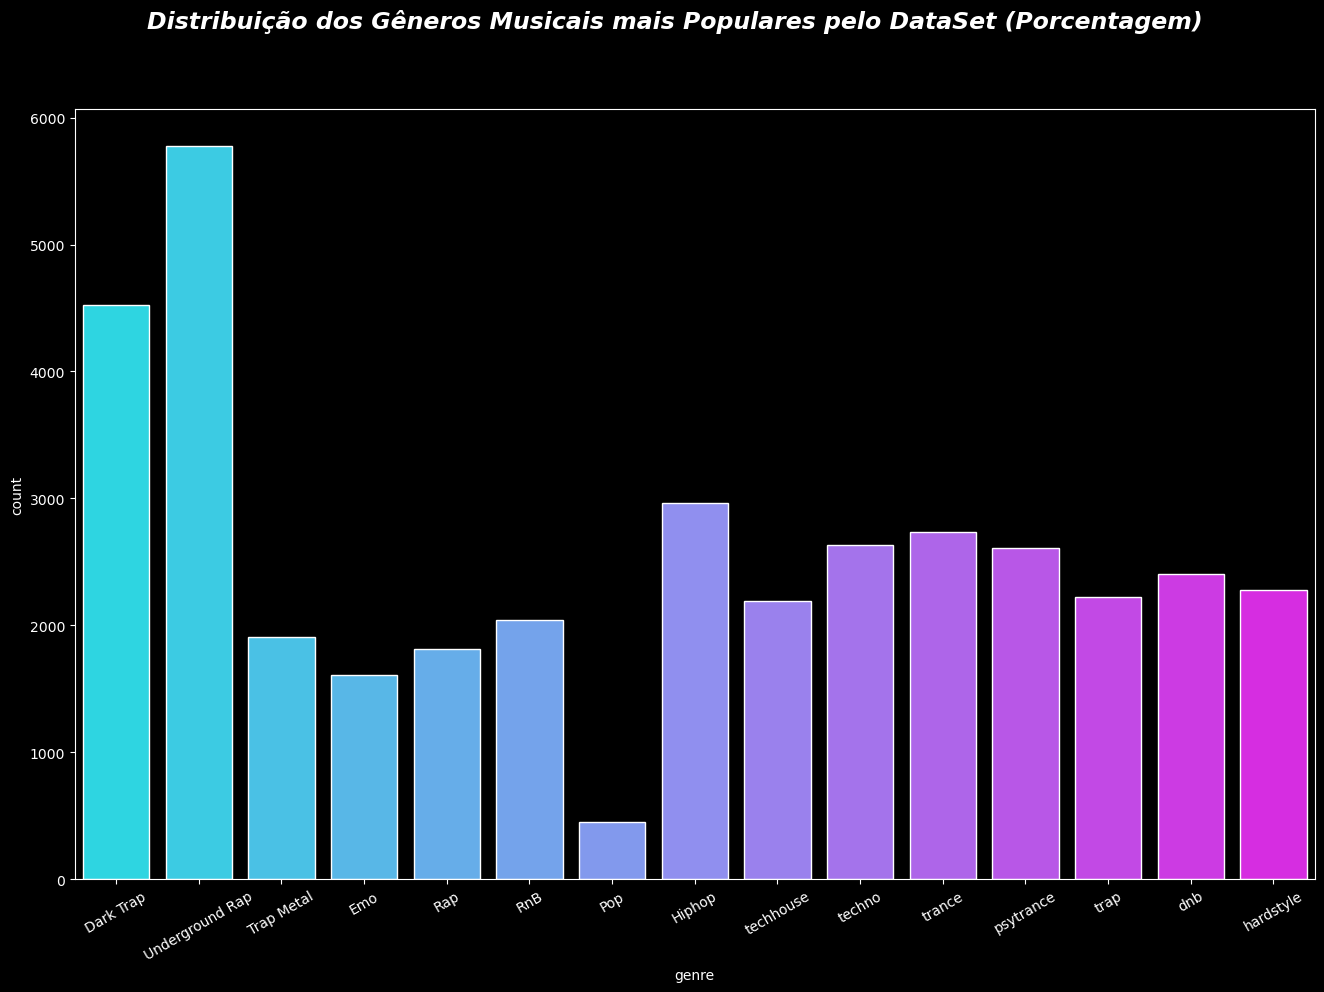

In [10]:

# genero_da_musica = ['Underground Rap', 'Dark Trap', 'Hip-Hop', 'Trance', 'Techno', 'Psytrance', 'dnb', 'HardStyle', 'Trap', 'Techhouse', 'Rnb', 'Trap Metal', 'Rap', 'Emo', 'Pop']
# quantidade_de_musica = ['5776', '4522', '2964 ', '2734', ' 2632', '2610 ', '2407', '2277', '2226', '2192', '2043', '1910 ', '1812 ', '1608', '452']


plt.style.use('dark_background')
color1 = sns.color=('cool')


fig = plt.figure(figsize=(16,10))
plt.suptitle('Distribuição dos Gêneros Musicais mais Populares pelo DataSet (Porcentagem)', fontsize=17, fontweight='bold', style='italic')
sns.countplot(x=df['genre'], edgecolor='white', palette=color1)
plt.xticks(rotation=30)
plt.show(); 

In [11]:
underground = df[df['genre'] == 'Underground Rap']
dark_trap = df[df['genre'] == 'Dark Trap']
hip_hop = df[df['genre'] == 'Hiphop']


big_3_music = pd.concat([underground, dark_trap, hip_hop])

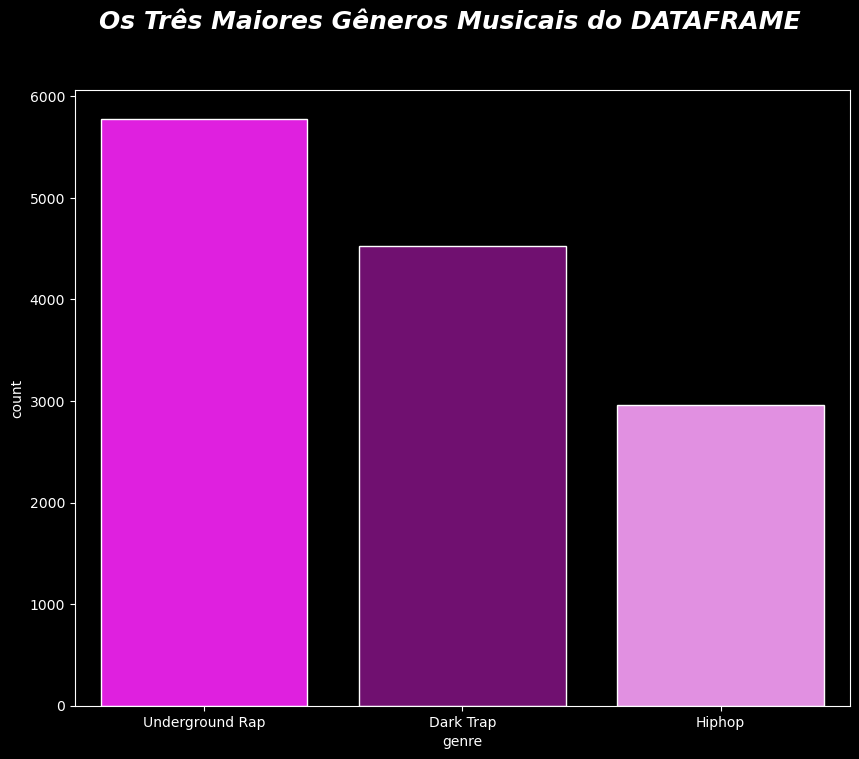

In [12]:
plt.style.use('dark_background')
color1 = sns.color=('magenta','purple', 'violet')


fig = plt.figure(figsize=(10,8))
plt.suptitle('Os Três Maiores Gêneros Musicais do DATAFRAME', fontsize=18, fontweight='bold', style='italic')
sns.countplot(x=big_3_music['genre'], palette=(color1), edgecolor='white')
plt.show()

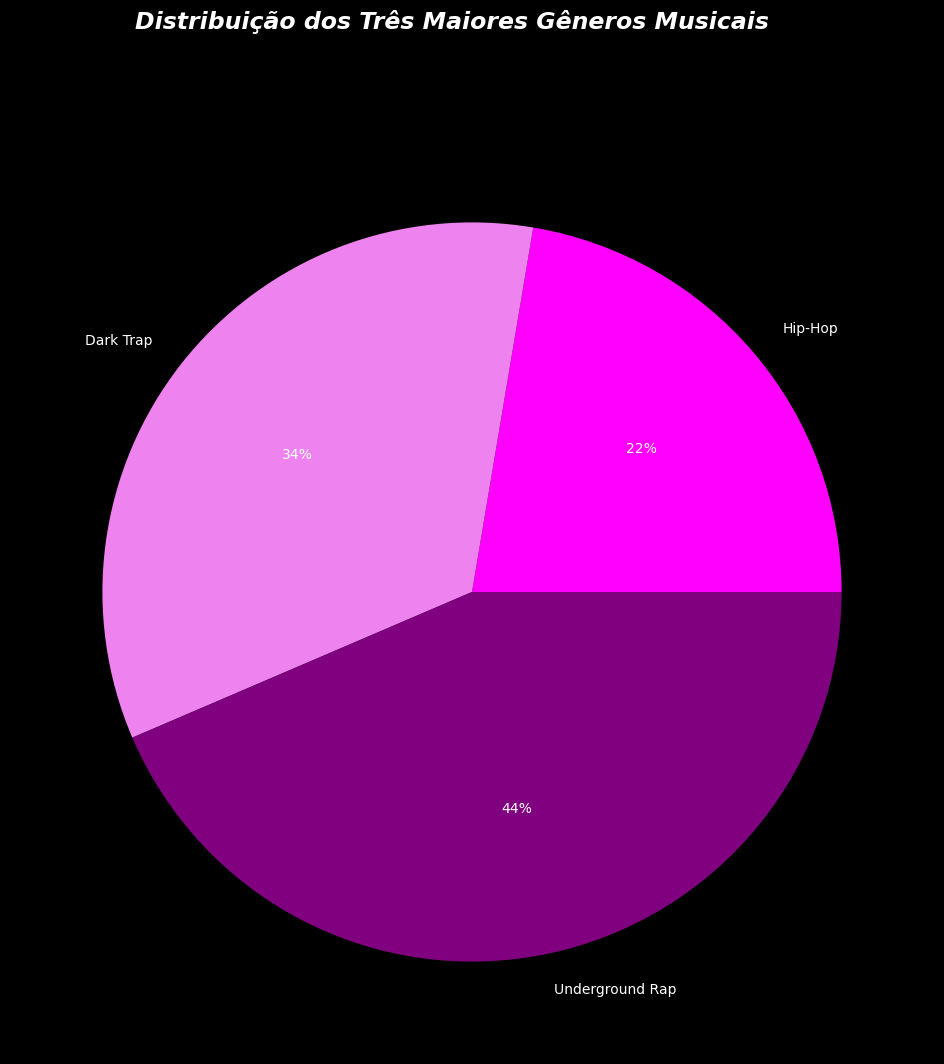

In [14]:
music_genr = ['Hip-Hop', 'Dark Trap', 'Underground Rap']
music_quant = ['2964', '4522', '5776']


plt.style.use('dark_background')
color2 = sns.color=('magenta','violet', 'purple')


fig = plt.figure(figsize=(16,12))
plt.suptitle('Distribuição dos Três Maiores Gêneros Musicais', fontsize=17, fontweight='bold', style='italic')
plt.pie(music_quant, labels=music_genr, colors=(color2), autopct='%.0f%%')
plt.show(); 

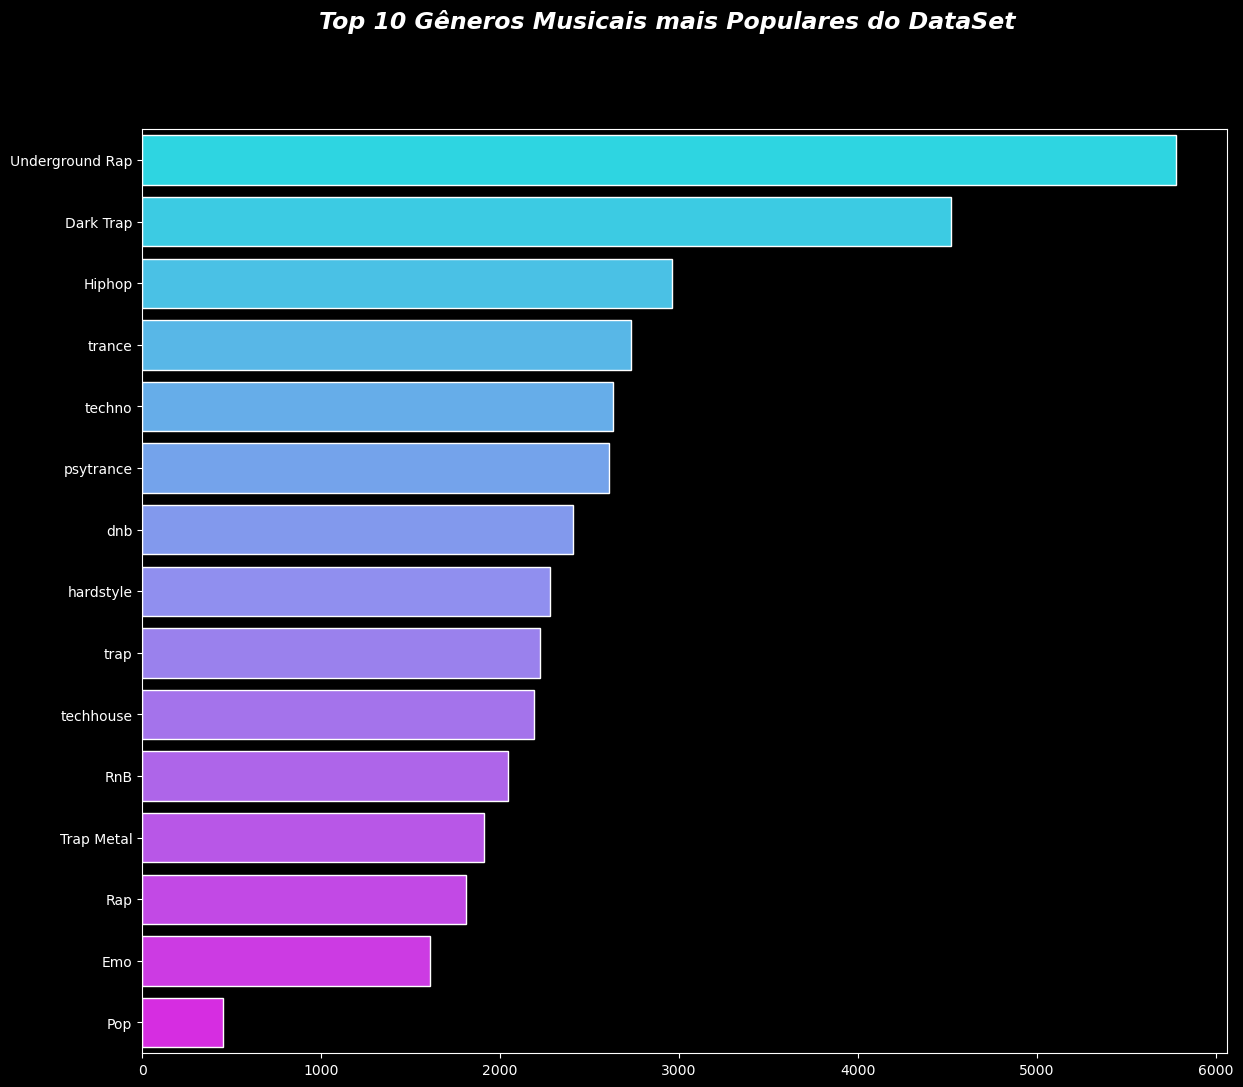

In [25]:
top_15_genre = df['genre'].value_counts().nlargest(15)
color3 = sns.color=('cool')

fig = plt.figure(figsize=(14,12))
plt.suptitle('Gêneros Musicais mais Populares do DataSet', fontsize=17, fontweight='bold', style='italic')
sns.barplot(x=top_15_genre.values, y=top_15_genre.index, orient='h', palette=(color3), edgecolor='white')
plt.show()

In [15]:
print(f"O DataSet possui {df[df['genre'] == 'Rap'].count()['genre']} musicas classificadas como sendo do genero RnB.\n")
print(f"O DataSet possui {df[df['genre'] == 'Hiphop'].count()['genre']} musicas classificadas como sendo do genero HIP-HOP.\n")
print(f"O DataSet possui {df[df['genre'] == 'Underground Rap'].count()['genre']} musicas classificadas como sendo do genero Underground Rap.\n")
print(f"O DataSet possui {df[df['genre'] == 'Trap Metal'].count()['genre']} musicas classificadas como sendo do genero Trap Metal.\n")
print(f"O DataSet possui {df[df['genre'] == 'Pop'].count()['genre']} musicas classificadas como sendo do genero Pop.\n")
print(f"O DataSet possui {df[df['genre'] == 'Emo'].count()['genre']} musicas classificadas como sendo do genero Emo.\n")
print(f"O DataSet possui {df[df['genre'] == 'trance'].count()['genre']} musicas classificadas como sendo do genero Trance.\n")
print(f"O DataSet possui {df[df['genre'] == 'hardstyle'].count()['genre']} musicas classificadas como sendo do genero HardStyle.\n")
print(f"O DataSet possui {df[df['genre'] == 'techno'].count()['genre']} musicas classificadas como sendo do genero Techno.\n")
print(f"O DataSet possui {df[df['genre'] == 'Dark Trap'].count()['genre']} musicas classificadas como sendo do genero Dark Trap.\n")
print(f"O DataSet possui {df[df['genre'] == 'psytrance'].count()['genre']} musicas classificadas como sendo do genero PsyTrance.\n")
print(f"O DataSet possui {df[df['genre'] == 'techhouse'].count()['genre']} musicas classificadas como sendo do genero Techhouse.\n")
print(f"O DataSet possui {df[df['genre'] == 'trap'].count()['genre']} musicas classificadas como sendo do genero Trap.\n")
print(f"O DataSet possui {df[df['genre'] == 'dnb'].count()['genre']} musicas classificadas como sendo do genero Dnb.\n")

O DataSet possui 1812 musicas classificadas como sendo do genero RnB.

O DataSet possui 2964 musicas classificadas como sendo do genero HIP-HOP.

O DataSet possui 5776 musicas classificadas como sendo do genero Underground Rap.

O DataSet possui 1910 musicas classificadas como sendo do genero Trap Metal.

O DataSet possui 452 musicas classificadas como sendo do genero Pop.

O DataSet possui 1608 musicas classificadas como sendo do genero Emo.

O DataSet possui 2734 musicas classificadas como sendo do genero Trance.

O DataSet possui 2277 musicas classificadas como sendo do genero HardStyle.

O DataSet possui 2632 musicas classificadas como sendo do genero Techno.

O DataSet possui 4522 musicas classificadas como sendo do genero Dark Trap.

O DataSet possui 2610 musicas classificadas como sendo do genero PsyTrance.

O DataSet possui 2192 musicas classificadas como sendo do genero Techhouse.

O DataSet possui 2226 musicas classificadas como sendo do genero Trap.

O DataSet possui 2407 mu

In [26]:
df_x = df[df.columns[:11]]
df_x.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   
5         0.721   0.568    0   -11.295     1       0.4140        0.0452   
6         0.718   0.668    8    -4.162     1       0.1370        0.0254   
7         0.694   0.711    8    -5.525     1       0.2210        0.0397   
8         0.774   0.751    1    -2.445     1       0.1980        0.0614   
9         0.893   0.907   11   -10.406     1       0.3670        0.1520   

   instrumentalness  liveness  valence    tempo  
0          0.013400    0.0556   0.3890  156.985  
1          0.000000    0.1180   0.1240  115.080  
2          0.000004    0.3720   0.0391  218.050  
3          0.000000    0.1140   0.1750  186.948  
4          0.000000    0.1660   0.5910  147.988  
5          0.212000    0.1280   0.1090  144.915  
6          0.007800    0.1240   0.0380  130.826  
7          0.000000    0.1120   0.2830  138.049  
8          0.000000    0.0728   0.1890  219.960  
9          0.031100    0.5580   0.3020  199.942

In [27]:
df_new = df_x.copy()
df_new['genre'] = df['genre']
df_new['time_signature'] = df['time_signature']
df_new['duration_ms'] = df['duration_ms']

df_new.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   
5         0.721   0.568    0   -11.295     1       0.4140        0.0452   
6         0.718   0.668    8    -4.162     1       0.1370        0.0254   
7         0.694   0.711    8    -5.525     1       0.2210        0.0397   
8         0.774   0.751    1    -2.445     1       0.1980        0.0614   
9         0.893   0.907   11   -10.406     1       0.3670        0.1520   

   instrumentalness  liveness  valence    tempo      genre  time_signature  \
0          0.013400    0.0556   0.3890  156.985  Dark Trap               4   
1          0.000000    0.1180   0.1240  115.080  Dark Trap               4   
2          0.000004    0.3720   0.0391  218.050  Dark Trap               4   
3          0.000000    0.1140   0.1750  186.948  Dark Trap               3   
4          0.000000    0.1660   0.5910  147.988  Dark Trap               4   
5          0.212000    0.1280   0.1090  144.915  Dark Trap               4   
6          0.007800    0.1240   0.0380  130.826  Dark Trap               4   
7          0.000000    0.1120   0.2830  138.049  Dark Trap               3   
8          0.000000    0.0728   0.1890  219.960  Dark Trap               4   
9          0.031100    0.5580   0.3020  199.942  Dark Trap               4   

   duration_ms  
0       124539  
1       224427  
2        98821  
3       123661  
4       123298  
5       112511  
6        77584  
7       127524  
8       140326  
9       121979

In [28]:
df_new['duration_min'] = df_new['duration_ms']/60000
df_new.drop('duration_ms',axis=1,inplace=True)

In [29]:
df_new

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42298         0.502   0.991    5    -4.333     0       0.2400      0.005540   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo      genre  \
0              0.013400    0.0556   0.3890  156.985  Dark Trap   
1              0.000000    0.1180   0.1240  115.080  Dark Trap   
2              0.000004    0.3720   0.0391  218.050  Dark Trap   
3              0.000000    0.1140   0.1750  186.948  Dark Trap   
4              0.000000    0.1660   0.5910  147.988  Dark Trap   
...                 ...       ...      ...      ...        ...   
42298          0.000198    0.4700   0.0797  150.029  hardstyle   
42300          0.000345    0.1210   0.3940  150.013  hardstyle   
42302          0.000242    0.3850   0.1240  154.935  hardstyle   
42303          0.029600    0.0575   0.4880  150.042  hardstyle   
42304          0.000055    0.4140   0.1340  155.047  hardstyle   

       time_signature  duration_min  
0                   4      2.075650  
1                   4      3.740450  
2                   4      1.647017  
3                   3      2.061017  
4                   4      2.054967  
...               ...           ...  
42298               4      3.333333  
42300               4      4.486800  
42302               4      3.913717  
42303               4      5.386667  
42304               4      2.702683  

[38165 rows x 14 columns]

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

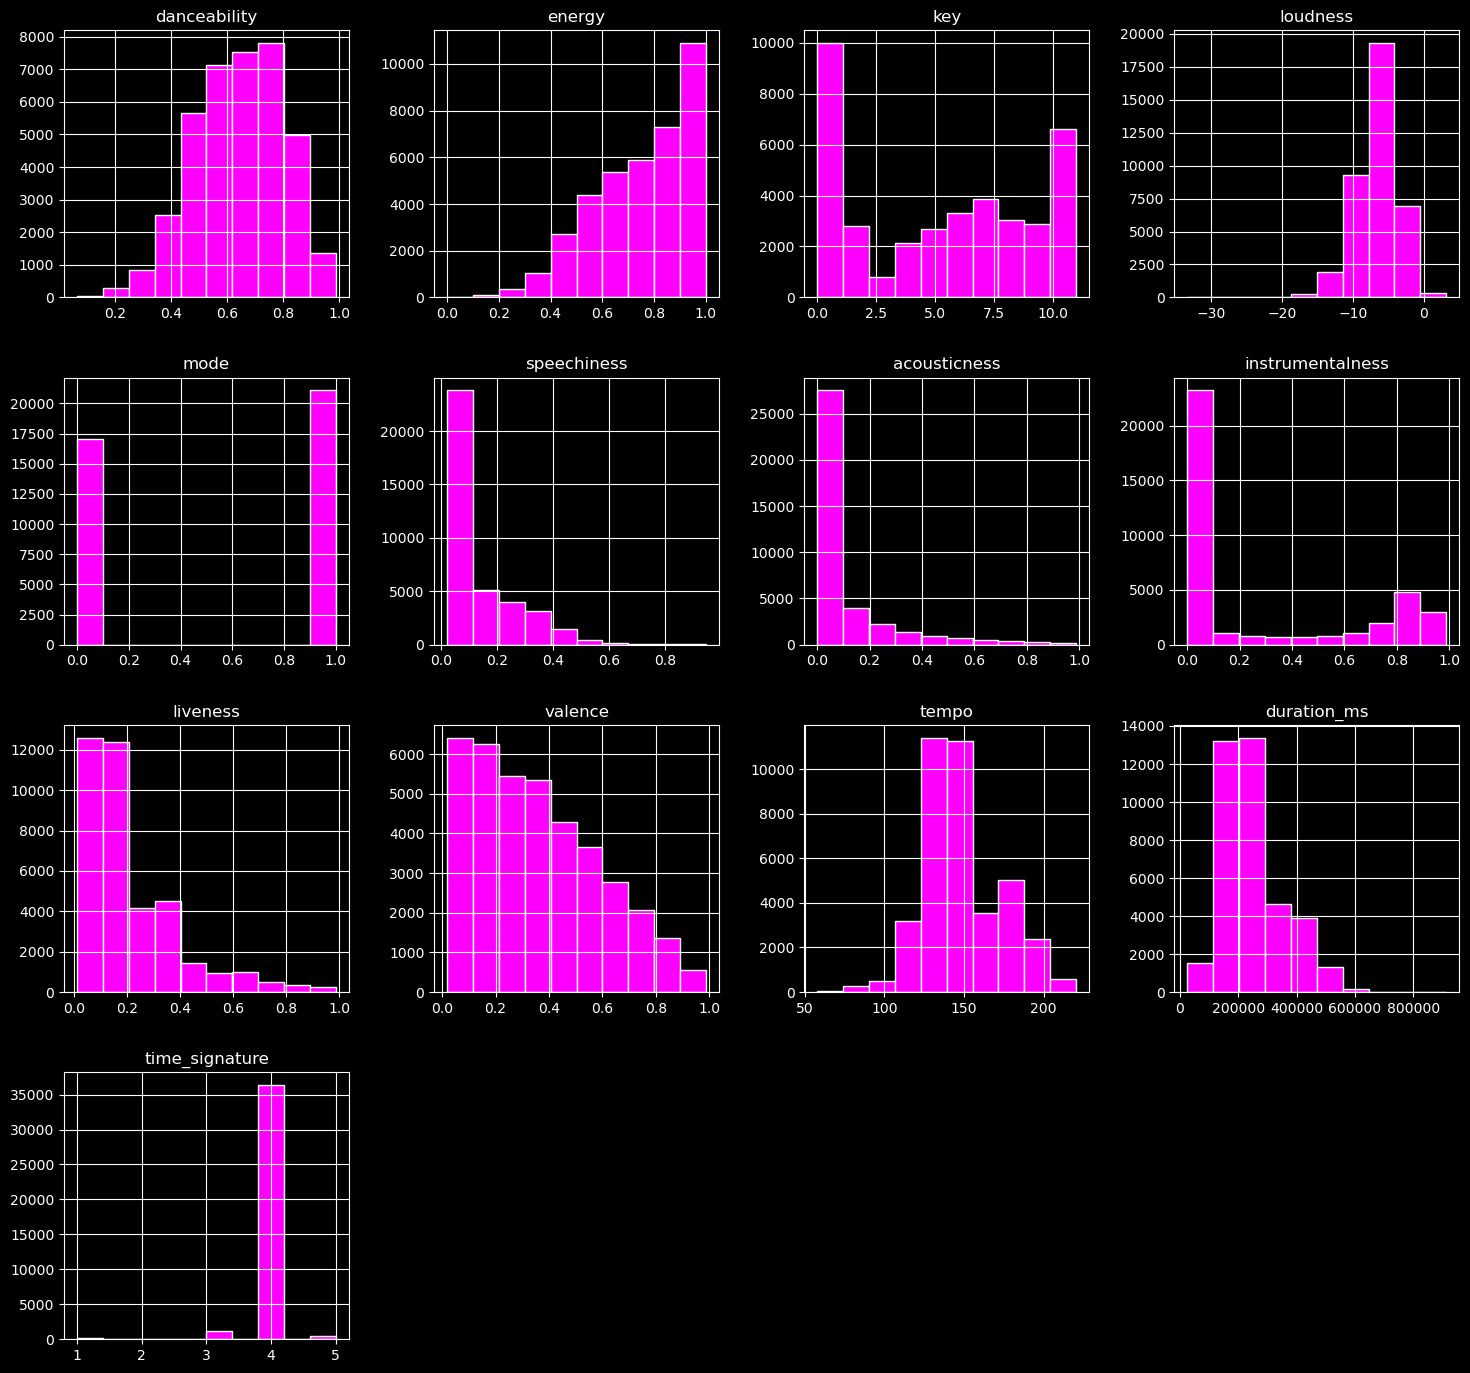

In [35]:
plt.style.use('dark_background')
df.hist(figsize=(18, 17), color='magenta', edgecolor='white')

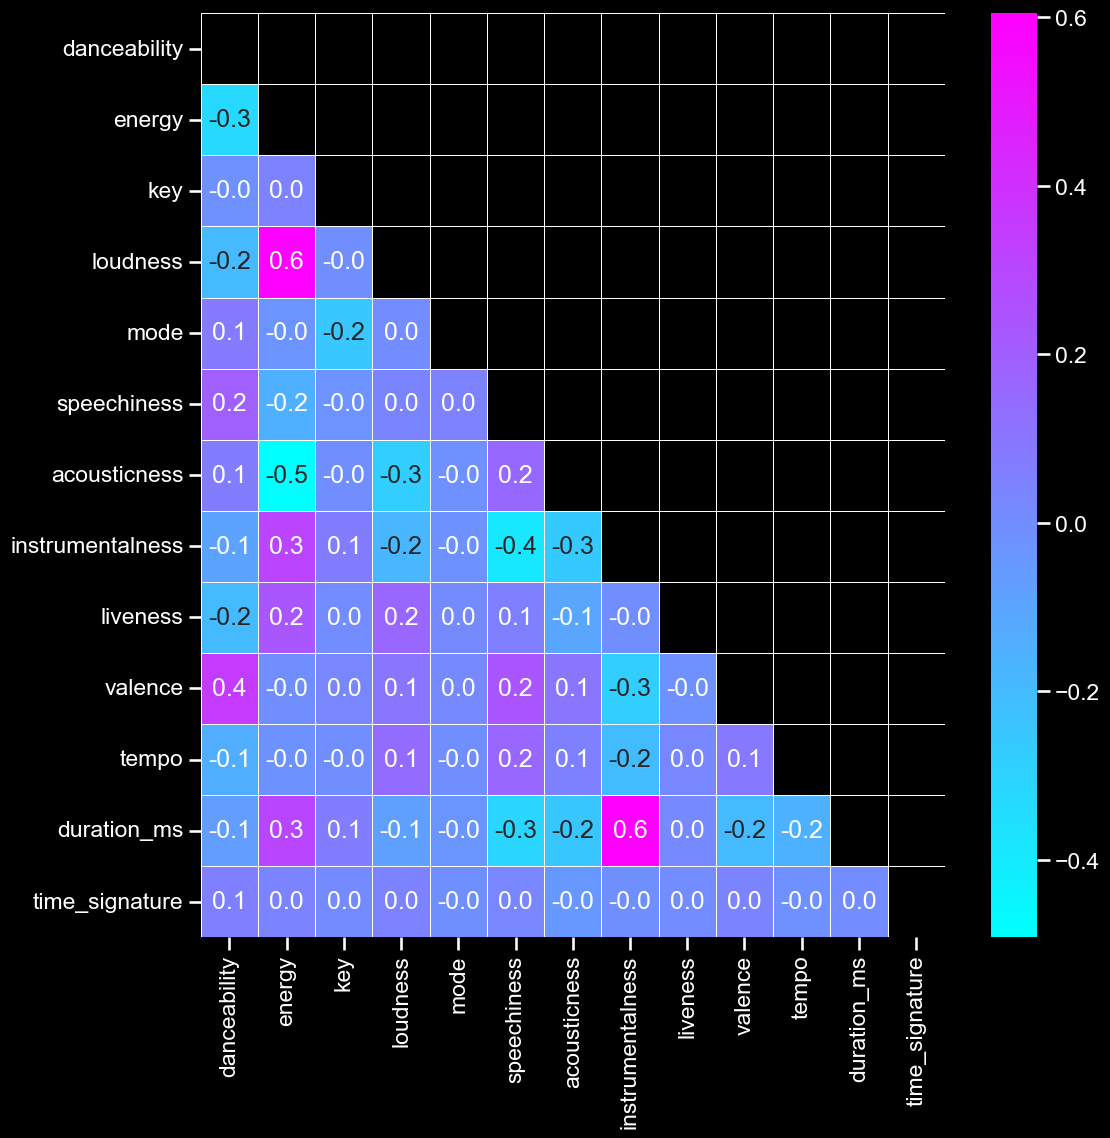

In [40]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="cool",mask=mask)
plt.show() 

In [38]:
sns.set(style='ticks', context='talk')
plt.style.use("dark_background")

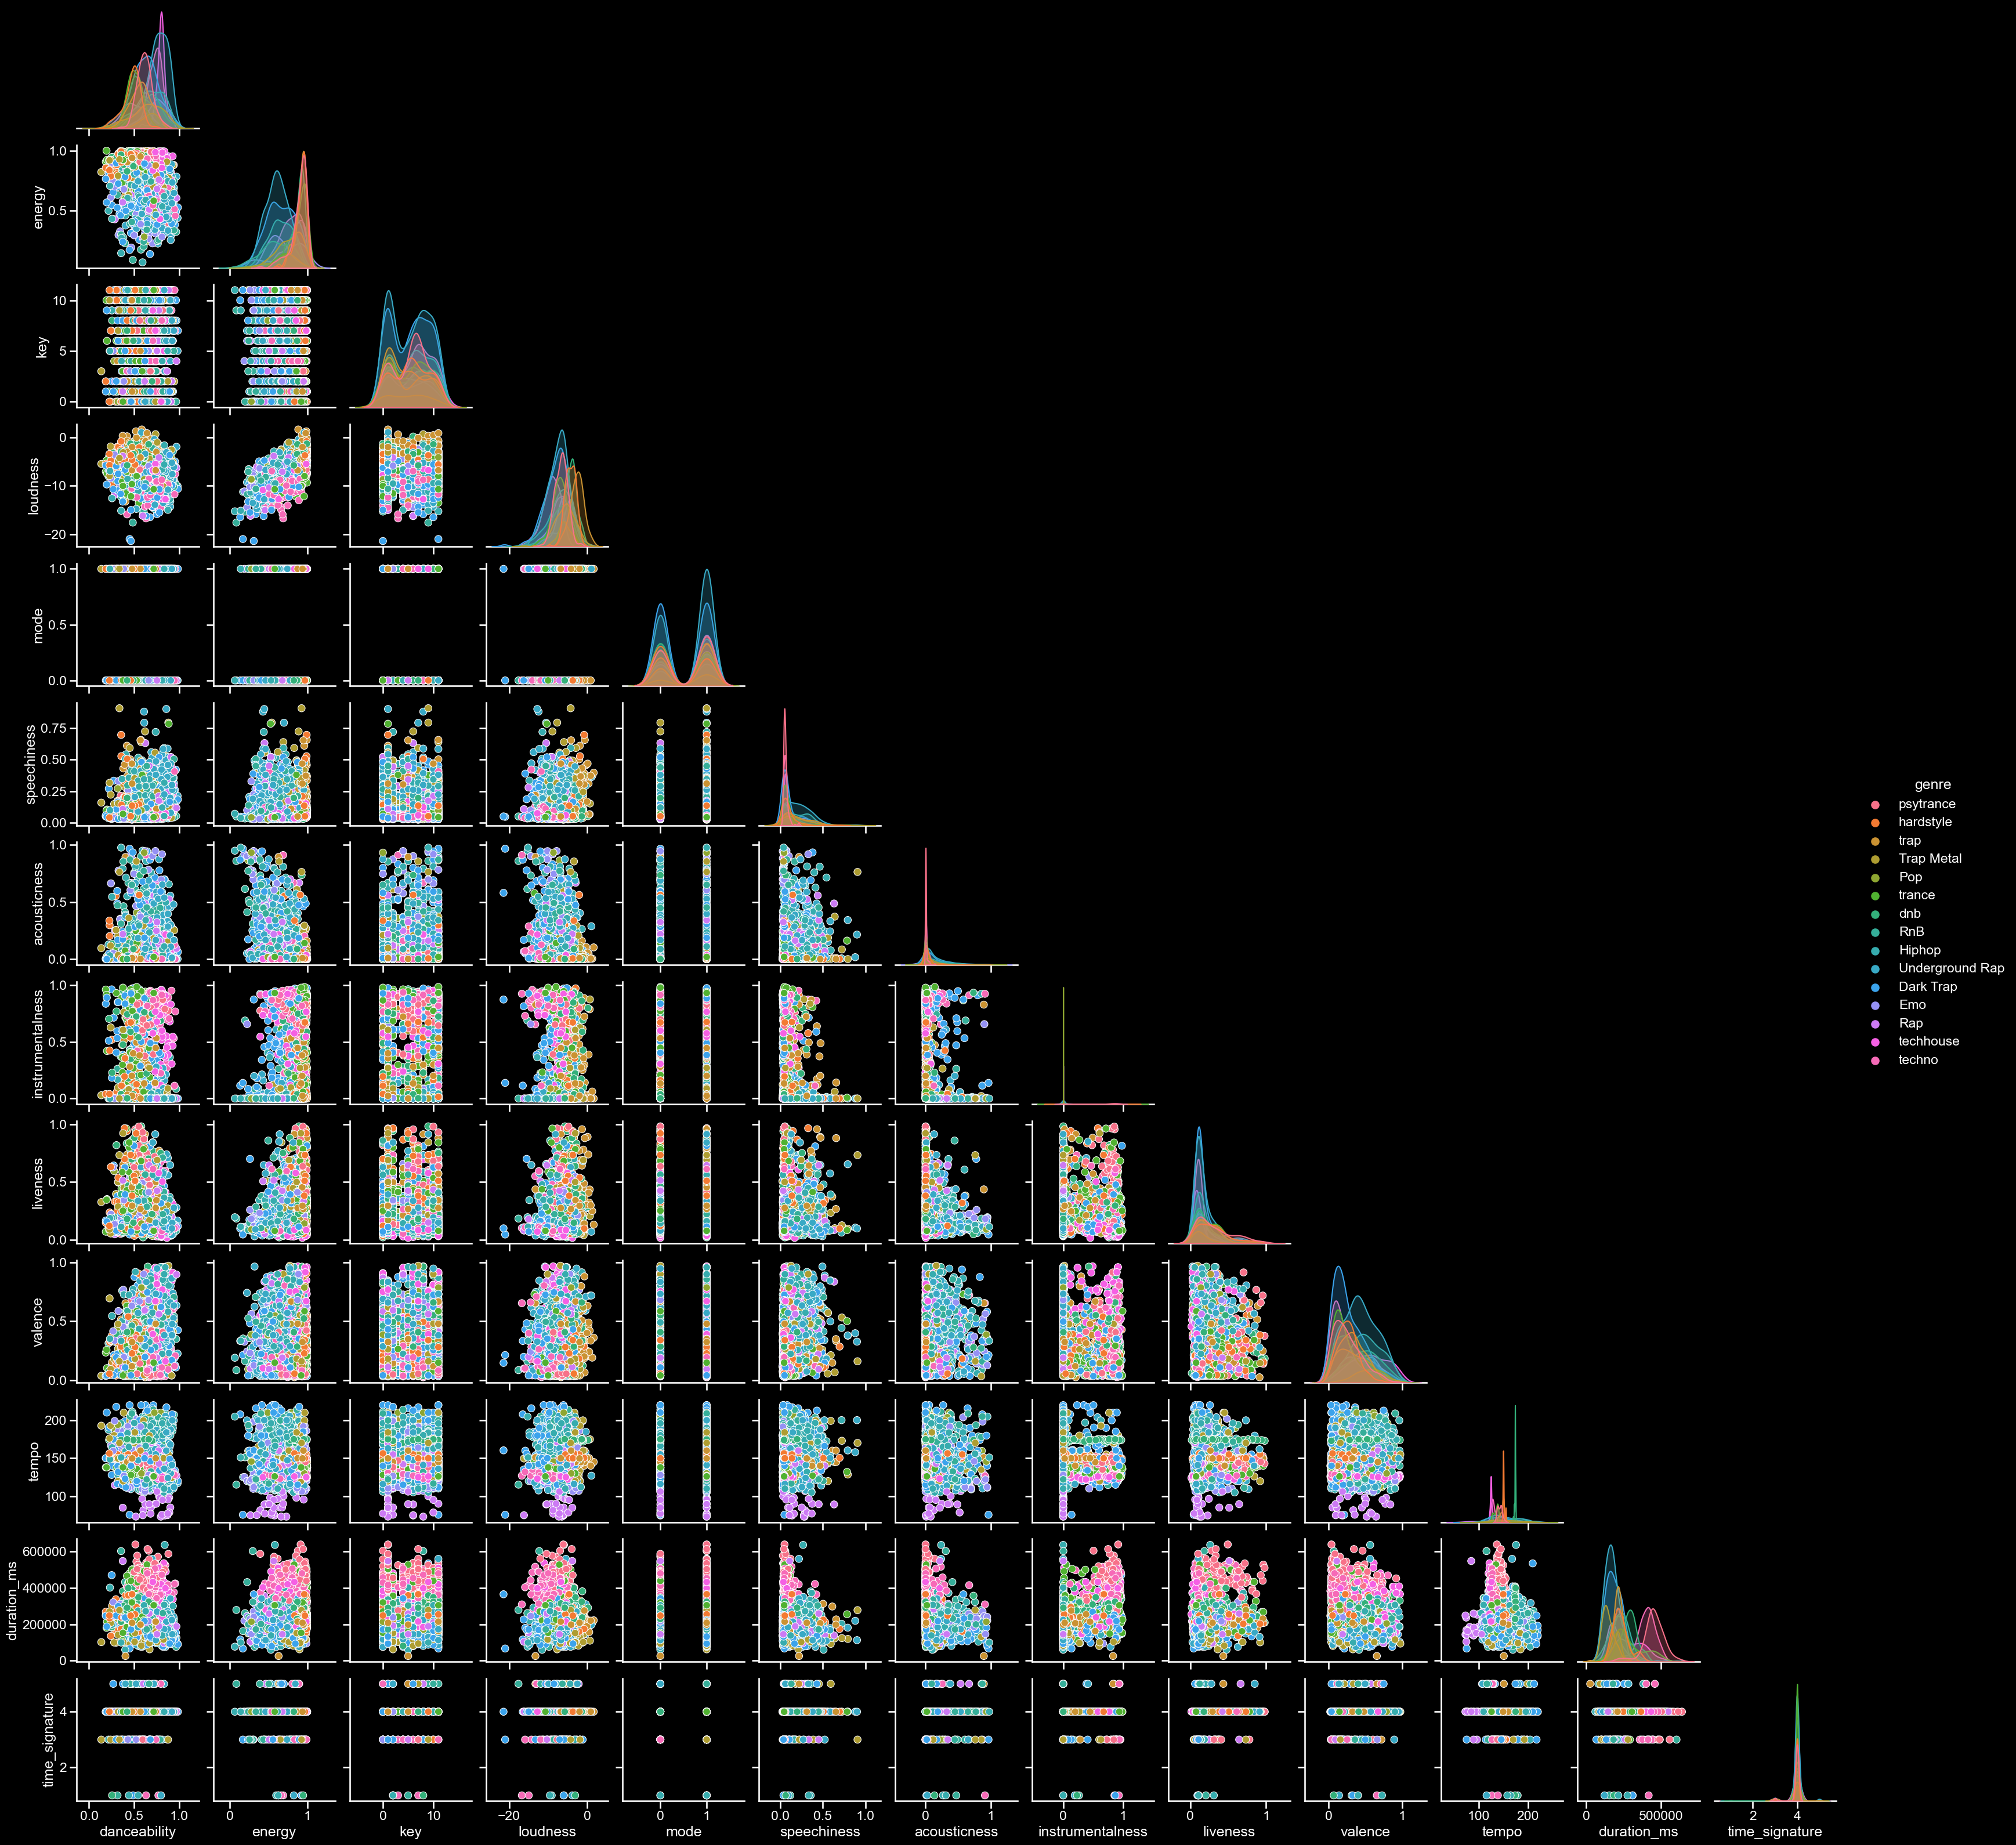

In [39]:
sns.pairplot(df.sample(2000), corner=True, hue='genre')

In [44]:
from sklearn.preprocessing import LabelEncoder
df_new['genre_enco'] = LabelEncoder().fit_transform(df_new['genre'])
df_new['genre_enco'].value_counts()

7     5776
0     4522
2     2964
13    2734
12    2632
10    2610
8     2407
9     2277
14    2226
11    2192
5     2043
6     1910
4     1812
1     1608
3      452
Name: genre_enco, dtype: int64

In [45]:
X1 = df_new.drop(columns=['genre','genre_enco'])
Y1 = df_new["genre_enco"]
print(X1.shape)

(38165, 13)


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X1_std = StandardScaler().fit_transform(X1)

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X1, Y1 = smote.fit_resample(X1_std, Y1)

print(X1.shape)

(86640, 13)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=.2, random_state=1, shuffle=True)

In [49]:
print(X_train.shape)
print(X_test.shape)

(69312, 13)
(17328, 13)


In [50]:
scoring = [['model','accuracy']]

In [51]:
def buildModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Modelo de Treino
    yhat = model.predict(X_test) # Predição
    score = accuracy_score(y_test, yhat)
    return {
      "predict": yhat,
      "accuracy": score
    }

In [52]:
def modelCrossValidation(X, Y, algo):
    validation = KFold(n_splits=5, shuffle=True, random_state=1)
    statsNames = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'f1_macro']

    res = {}
    for sname in statsNames:
        res[sname] = round(cross_val_score(algo, X, Y, cv=validation, scoring=sname, n_jobs=-1).mean(), 4)
    return res

[0.07803562 0.0563042  0.03245346 0.0573778  0.03801835 0.0542014
 0.03859245 0.17567253 0.02264122 0.05369483 0.23152918 0.02378499
 0.13769397]


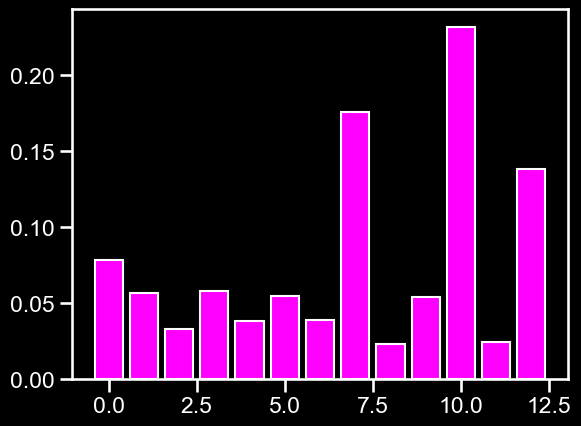

In [53]:
# Traçando manualmente a importância do recurso.
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


# Modelo de ajuste sem dados de treinamento
model = XGBClassifier()
model.fit(X_train, y_train)


# Features Importantes
print(model.feature_importances_)


# Gráfico Plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_, color='magenta', edgecolor='white')
pyplot.show()

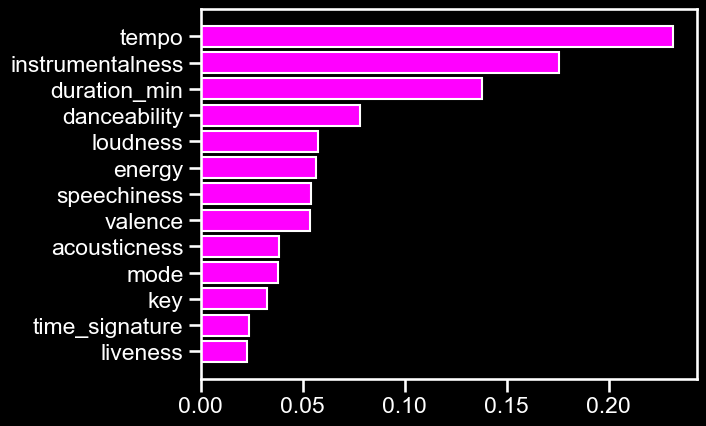

In [61]:
importance = model.feature_importances_
indices = np.argsort(importance)


fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices], color='magenta', edgecolor='white')
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.drop(columns=['genre','genre_enco']).columns)[indices])

# Regressão Logística e Acurácia do Modelo

In [62]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000);
res_LR = buildModel(model_LR, X_train, X_test, y_train, y_test)

print(res_LR["accuracy"])

0.5806786703601108


# Naive Bayes e Acurácia do Modelo

In [63]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
res_NB = buildModel(model_NB, X_train, X_test, y_train, y_test)
print(res_NB["accuracy"])

0.582006001846722


# K-Nearest Neighbors e Acurácia

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=4)
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)

scoring.append(['KNeighbors', res_KNN["accuracy"]])
scoring[1]

['KNeighbors', 0.7767197599261311]

# Gráfico de Matriz de Confusão

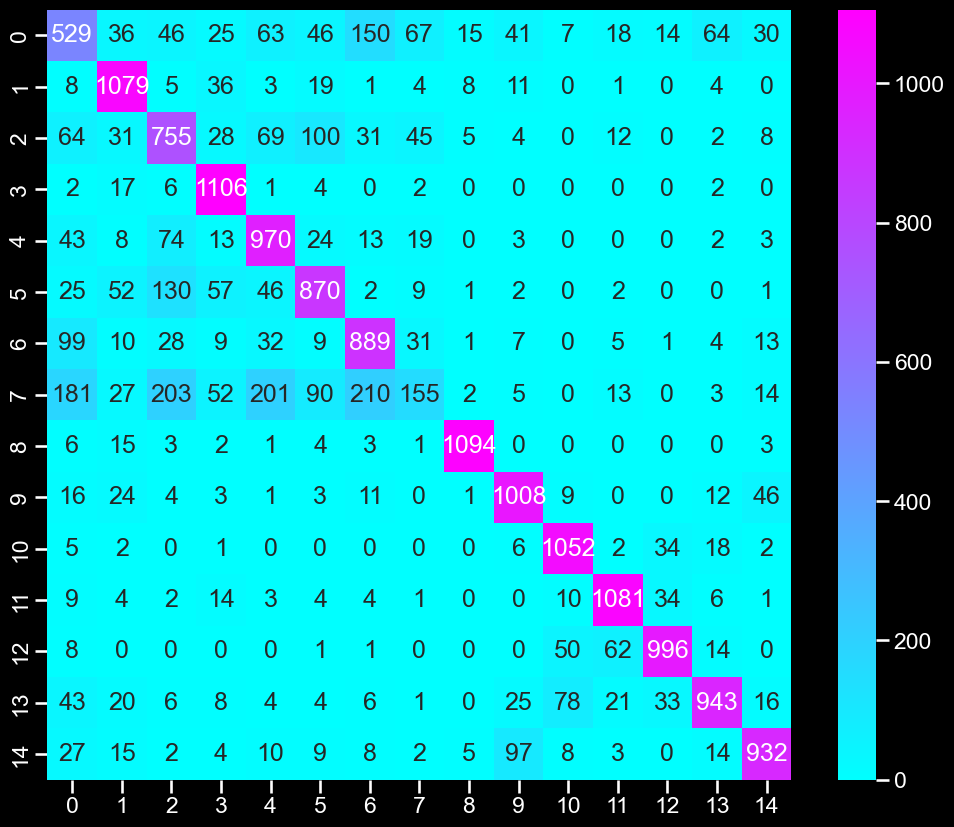

In [65]:
plt.style.use('dark_background')

cm = confusion_matrix(y_test, res_KNN['predict'])
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

# Árvore de Decisão e Acurácia

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
res_DT = buildModel(model_DT, X_train, X_test, y_train, y_test)
print(res_DT["accuracy"])

0.6364843028624192


# Executando a Importância em Relação as Features
# Features Importantes

In [67]:
importance = model_DT.feature_importances_


for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.09093
Feature: 1, Score: 0.05898
Feature: 2, Score: 0.00130
Feature: 3, Score: 0.04576
Feature: 4, Score: 0.00045
Feature: 5, Score: 0.04402
Feature: 6, Score: 0.01729
Feature: 7, Score: 0.09189
Feature: 8, Score: 0.00557
Feature: 9, Score: 0.04579
Feature: 10, Score: 0.44719
Feature: 11, Score: 0.00045
Feature: 12, Score: 0.15038


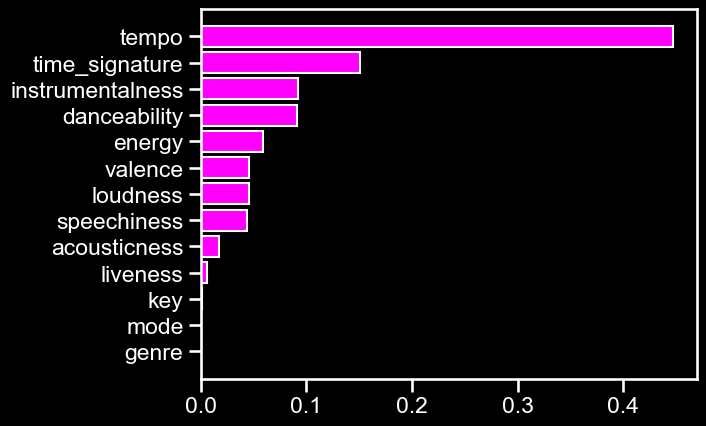

In [69]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices], color='magenta', edgecolor='white')
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.columns)[indices])

In [70]:
from sklearn.ensemble import RandomForestClassifier


# Treino para Acuracia
k = 5
model_RF = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=3)
cv_score = cross_val_score(model_RF, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean())


# Teste da Acuracia
clf_RF = model_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['RandomForest', score_accuracy])

Cross_val Scores:  [0.79802352 0.79686936 0.79851392 0.7997403  0.79930746]
Train Accuracy(average): 0.7984909119480547
Test Accuracy: 0.808056325023084


Feature: 0, Score: 0.09507
Feature: 1, Score: 0.07607
Feature: 2, Score: 0.03643
Feature: 3, Score: 0.08144
Feature: 4, Score: 0.01077
Feature: 5, Score: 0.07044
Feature: 6, Score: 0.06692
Feature: 7, Score: 0.09617
Feature: 8, Score: 0.05186
Feature: 9, Score: 0.07075
Feature: 10, Score: 0.21140
Feature: 11, Score: 0.00385
Feature: 12, Score: 0.12883


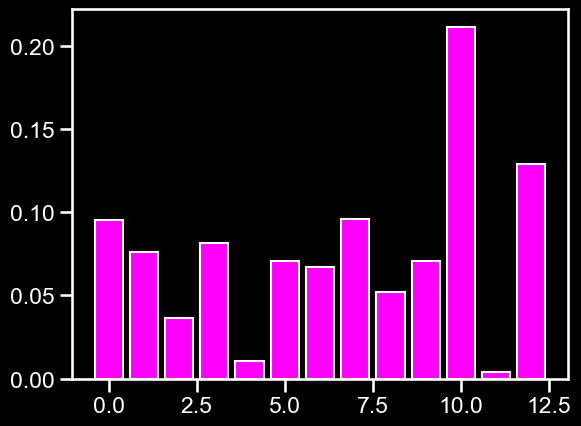

In [71]:
# Executando a Importancia em Relação as Features.
importance = model_RF.feature_importances_


# Features Importantes
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
    
# Gráfico das Features Importantes
pyplot.bar([x for x in range(len(importance))], importance, color='magenta', edgecolor='white')
pyplot.show()

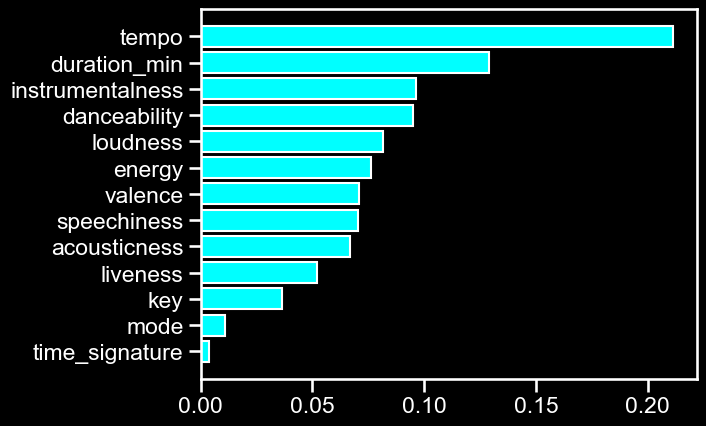

In [74]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices], color='cyan', edgecolor='white')
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df_new.drop(columns=['genre','genre_enco']).columns)[indices])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56      1151
           1       0.88      0.90      0.89      1179
           2       0.65      0.63      0.64      1154
           3       0.89      0.94      0.91      1140
           4       0.71      0.77      0.74      1172
           5       0.73      0.75      0.74      1197
           6       0.65      0.72      0.68      1138
           7       0.37      0.30      0.33      1156
           8       0.98      0.99      0.99      1132
           9       0.92      0.95      0.94      1138
          10       0.97      0.95      0.96      1122
          11       0.94      0.95      0.94      1173
          12       0.92      0.92      0.92      1132
          13       0.91      0.93      0.92      1208
          14       0.91      0.91      0.91      1136

    accuracy                           0.81     17328
   macro avg       0.80      0.81      0.80     17328
weighted avg       0.80   

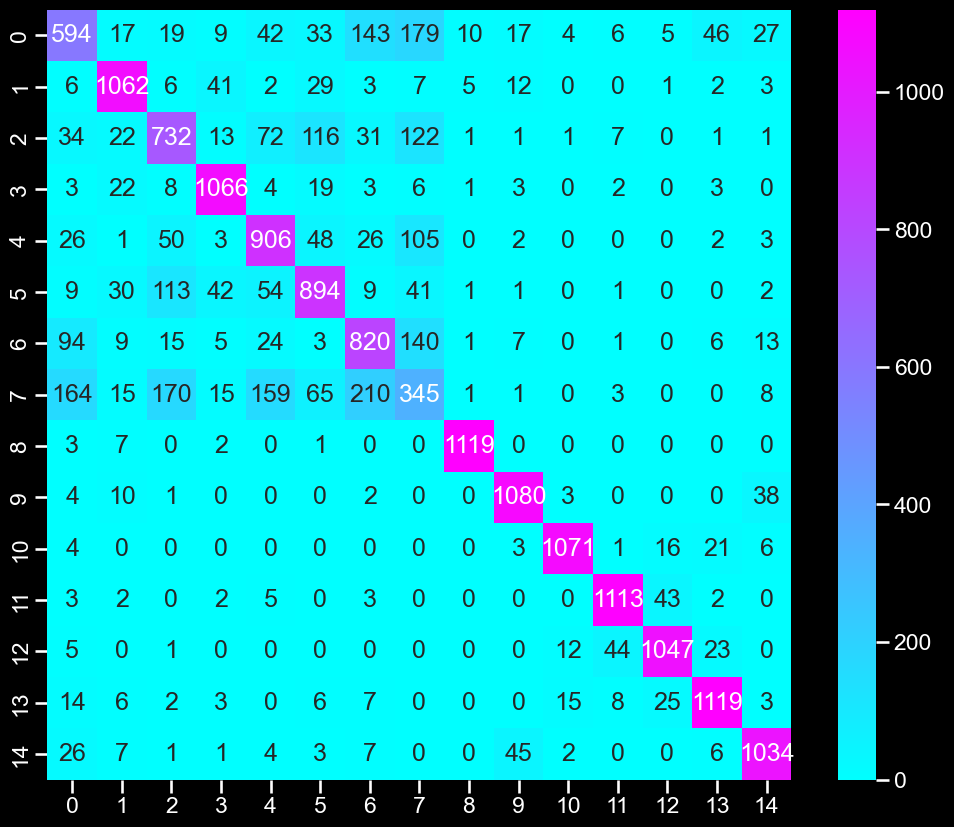

In [76]:

cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

k = 3

# Treino para Acuracia
model_svc = SVC(kernel="rbf", C=1000, gamma="scale") 
cv_score = cross_val_score(model_svc, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Teste da Acuracia
clf_svc = model_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['SVC', score_accuracy])

Cross_val Scores:  [0.7849723  0.7859678  0.78540512]
Train Accuracy(average): 0.7854484072022161
Test Accuracy: 0.8138850415512465


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1151
           1       0.89      0.92      0.91      1179
           2       0.64      0.66      0.65      1154
           3       0.91      0.97      0.94      1140
           4       0.72      0.82      0.77      1172
           5       0.76      0.75      0.76      1197
           6       0.70      0.78      0.73      1138
           7       0.36      0.25      0.29      1156
           8       0.98      0.99      0.98      1132
           9       0.94      0.93      0.93      1138
          10       0.96      0.95      0.95      1122
          11       0.93      0.94      0.94      1173
          12       0.91      0.92      0.91      1132
          13       0.92      0.89      0.91      1208
          14       0.93      0.92      0.92      1136

    accuracy                           0.81     17328
   macro avg       0.81      0.81      0.81     17328
weighted avg       0.81   

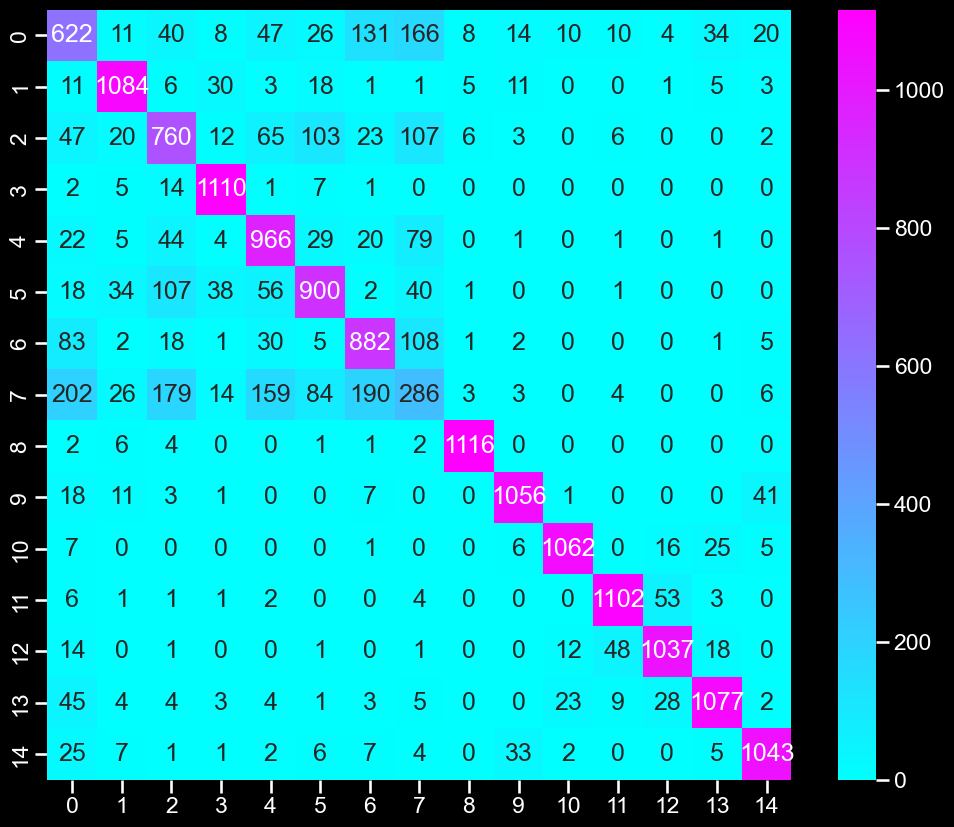

In [79]:

cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

In [80]:

from sklearn.ensemble import BaggingClassifier
k = 5

# Treino para Acuracia
model_Bag = BaggingClassifier()
cv_score = cross_val_score(model_Bag, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Teste da Acuracia
clf_bag = model_Bag.fit(X_train, y_train)
y_pred = clf_bag.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['Bagging', score_accuracy])

Cross_val Scores:  [0.74659165 0.74579817 0.74945895 0.74873756 0.74816044]
Train Accuracy(average): 0.7477493523327858
Test Accuracy: 0.760791782086796


In [81]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.47      0.48      1151
           1       0.81      0.85      0.83      1179
           2       0.59      0.58      0.59      1154
           3       0.82      0.89      0.85      1140
           4       0.67      0.72      0.69      1172
           5       0.68      0.66      0.67      1197
           6       0.59      0.62      0.61      1138
           7       0.30      0.24      0.26      1156
           8       0.98      0.97      0.98      1132
           9       0.90      0.92      0.91      1138
          10       0.94      0.94      0.94      1122
          11       0.91      0.93      0.92      1173
          12       0.90      0.89      0.89      1132
          13       0.88      0.88      0.88      1208
          14       0.89      0.85      0.87      1136

    accuracy                           0.76     17328
   macro avg       0.76      0.76      0.76     17328
weighted avg       0.75   

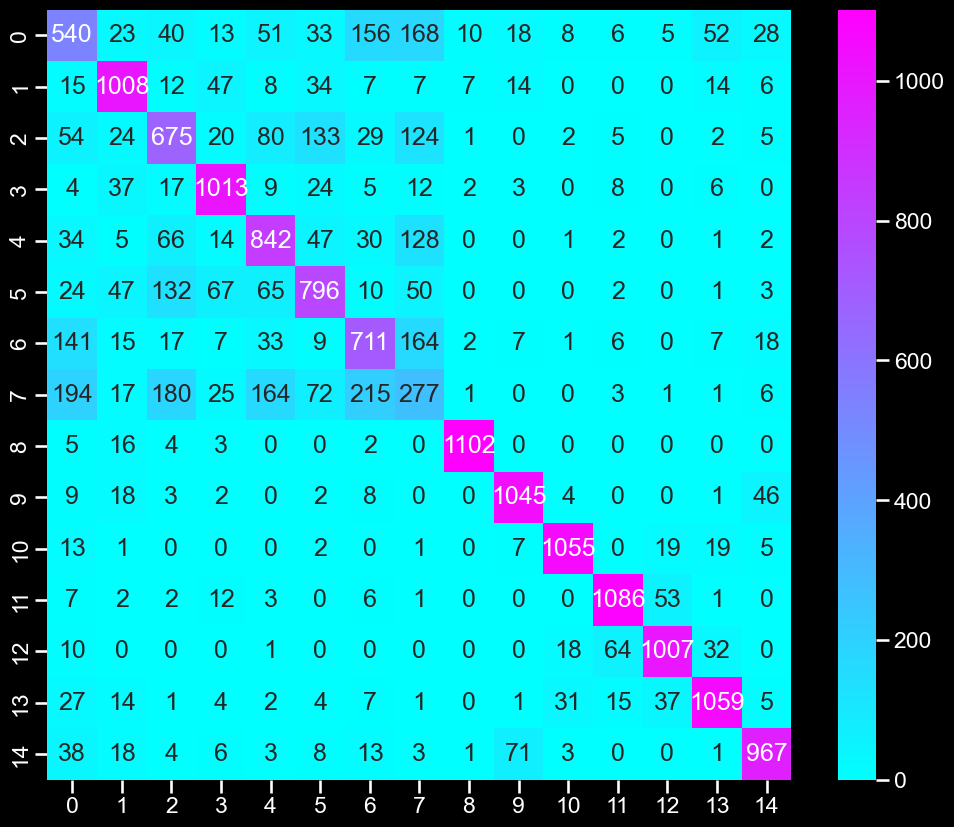

In [82]:
# Gráfico de Matriz de Correlação.

cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="cool")

# Comparando o Resultado do Modelo

In [83]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = scoring[0]

for i in range(len(scoring)):
    if i!=0:
        table.add_row(scoring[i])
print(table)

+--------------+--------------------+
|    model     |      accuracy      |
+--------------+--------------------+
|  KNeighbors  | 0.7767197599261311 |
| RandomForest | 0.808056325023084  |
|     SVC      | 0.8138850415512465 |
|   Bagging    | 0.760791782086796  |
+--------------+--------------------+


# Gráfico para Apenas Comparar os Algoritmos

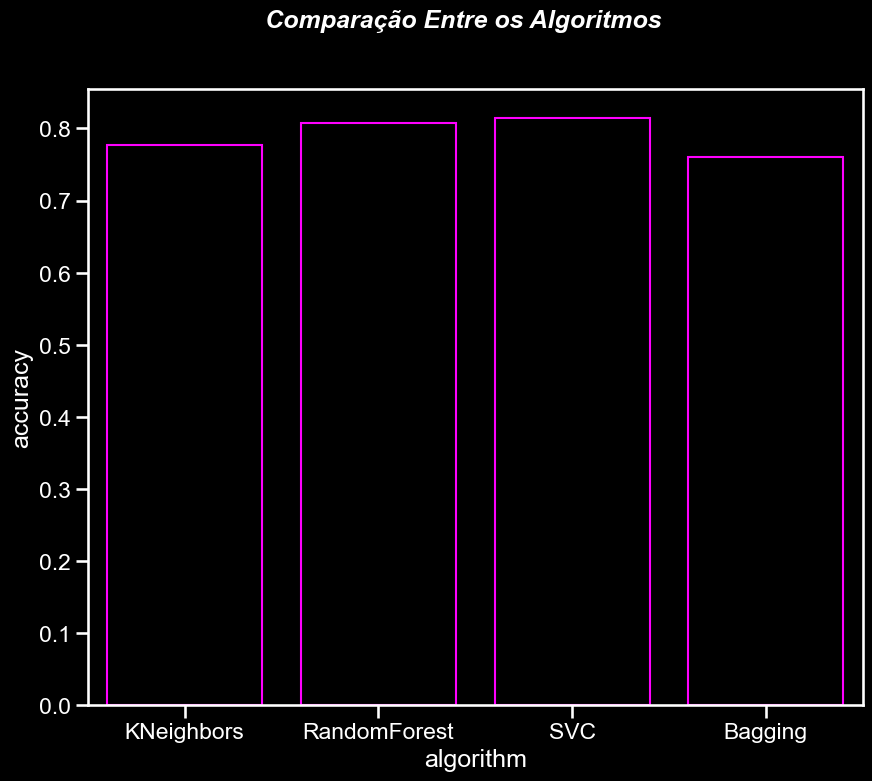

In [93]:
toChart = pd.DataFrame(scoring, columns =['algorithm', 'accuracy']) 
toChart.drop(0, inplace=True)

# px.bar(toChart, x="algorithm", y="accuracy")


fig = plt.figure(figsize=(10,8))
plt.suptitle('Comparação Entre os Algoritmos', fontsize=18, fontweight='bold', style='italic')
sns.barplot(x=toChart['algorithm'], y=toChart['accuracy'], color='black', edgecolor='magenta')
plt.show()

# Conclusão das Comparações dos Algoritmos:

### Ao Vermos os Algoritmos e suas Escalas vemos que não há uma Descrepância de Precisão entre eles, porém, o melhor Algoritmo para Implementação do Modelo como Sugestão seria em Sequência:

## - SVC ( Acurácia = 0.81 )
## - RandomForest ( Acurácia = 0.80 )
## - KNeighbors ( Acurácia = 0.77 )
## - Bagging ( Acurácia = 0.76 )
